In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.utils import np_utils
import cv2
import numpy as np

In [297]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [214]:
''' 1차원으로 만들어서 실행할 때 '''
X_train = X_train.reshape(-1,28*28)
X_test = X_test.reshape(-1,28*28)
print( X_test.shape, X_train.shape )

(10000, 784) (60000, 784)


In [298]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [299]:
''' 3차원으로 만들어서 실행할 때 '''
X_train = np.expand_dims( X_train, axis=0 ).reshape(-1,28,28,1)
X_test = np.expand_dims( X_test, axis=0 ).reshape(-1,28,28,1)
print( X_test.shape, X_train.shape )

(10000, 28, 28, 1) (60000, 28, 28, 1)


In [300]:
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

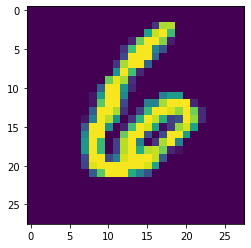

6

In [302]:
plt.imshow(X_train[13])
plt.show()
y_train[13].argmax(axis = 0)

In [ ]:
plt.imshow(X_train[13].reshape(28,28))
plt.show()
y_train[13].argmax(axis = 0)

In [303]:
# 3차원 모델
def ThreeDimensionModel():
    new2DModel = keras.Sequential([
        layers.Conv2D(32, (3,3), activation=layers.LeakyReLU(alpha=0.1), input_shape = (28,28,1) ),
        layers.Dropout(0.05),
        layers.Conv2D(32, (3,3), activation=layers.LeakyReLU(alpha=0.1)),
        layers.Dropout(0.05),
        layers.Conv2D(32, (3,3), activation=layers.LeakyReLU(alpha=0.1)),
        layers.Flatten(),
        layers.Dense(128, activation=layers.LeakyReLU(alpha=0.1)),
        layers.Dense(10, activation='softmax')
    ])
    new2DModel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    new2DModel.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 dropout_20 (Dropout)        (None, 26, 26, 32)        0         
                                                                 
 conv2d_12 (Conv2D)          (None, 24, 24, 32)        9248      
                                                                 
 dropout_21 (Dropout)        (None, 24, 24, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 22, 22, 32)        9248      
                                                                 
 flatten_3 (Flatten)         (None, 15488)             0         
                                                                 
 dense_63 (Dense)            (None, 128)             

In [304]:
new2DModel.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 74s 40ms/step - loss: 0.1097 - accuracy: 0.9663
Epoch 2/10
1875/1875 [==============================] - 76s 40ms/step - loss: 0.0412 - accuracy: 0.9872
Epoch 3/10
1875/1875 [==============================] - 76s 41ms/step - loss: 0.0284 - accuracy: 0.9910
Epoch 4/10
1875/1875 [==============================] - 77s 41ms/step - loss: 0.0207 - accuracy: 0.9935
Epoch 5/10
1875/1875 [==============================] - 76s 40ms/step - loss: 0.0165 - accuracy: 0.9946
Epoch 6/10
1875/1875 [==============================] - 76s 41ms/step - loss: 0.0150 - accuracy: 0.9951
Epoch 7/10
1875/1875 [==============================] - 77s 41ms/step - loss: 0.0121 - accuracy: 0.9961
Epoch 8/10
1875/1875 [==============================] - 82s 44ms/step - loss: 0.0096 - accuracy: 0.9966
Epoch 9/10
1875/1875 [==============================] - 80s 42ms/step - loss: 0.0096 - accuracy: 0.9972
Epoch 10/10
1875/1875 [==============================] - 79s 42m

In [341]:
new2DModel.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0462 - accuracy: 0.9902


[0.04619140177965164, 0.9901999831199646]

In [226]:
# 1차원으로 변경해서 만든 모델
def oneDimensionModel():
   toyModel = keras.Sequential([
      layers.Dense(input_dim = 28*28, units=128, activation=layers.LeakyReLU(alpha=0.1)),
      layers.Dropout(0.05),
      layers.Dense(256, activation=layers.LeakyReLU(alpha=0.1)),
      layers.Dropout(0.05),
      layers.Dense(256, activation=layers.LeakyReLU(alpha=0.1)),
      layers.Dropout(0.05),
      layers.Dense(256, activation=layers.LeakyReLU(alpha=0.1)),
      layers.Dense(10, activation='softmax')
   ])
   toyModel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
   toyModel.summary()
   return toyModel


Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_43 (Dense)            (None, 128)               100480    
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_44 (Dense)            (None, 256)               33024     
                                                                 
 dropout_9 (Dropout)         (None, 256)               0         
                                                                 
 dense_45 (Dense)            (None, 256)               65792     
                                                                 
 dropout_10 (Dropout)        (None, 256)               0         
                                                                 
 dense_46 (Dense)            (None, 256)             

In [227]:
toyModel.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2435 - accuracy: 0.9245
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1220 - accuracy: 0.9632
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0967 - accuracy: 0.9697
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0799 - accuracy: 0.9750
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0696 - accuracy: 0.9787
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0620 - accuracy: 0.9812
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0542 - accuracy: 0.9831
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0500 - accuracy: 0.9846
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0477 - accuracy: 0.9857
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.046

In [228]:
toyModel.evaluate(X_test, y_test)

313/313 [==============================] - 0s 728us/step - loss: 0.0880 - accuracy: 0.9778


[0.08796174824237823, 0.9778000116348267]

In [4]:
new2DModel = keras.models.load_model('2DModel.h5')

In [362]:
'''1차원으로 만들어 확인하기'''
answer = []
for i in range(0,10):
    # num_img = cv2.imread('realNumber'+str(i)+'.png')
    # num_img = cv2.imread('handnumber/hand'+str(i)+'.png')
    num_img = cv2.imread('new_test/'+str(i)+'.png')
    input_img = cv2.cvtColor( cv2.resize(num_img, (28,28)), cv2.COLOR_BGR2GRAY )
    input_img = input_img / 255.0
    answer.append( toyModel.predict(input_img.reshape(-1,28*28)).argmax(axis=1)[0] )
    
print(answer)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [542]:
''' 3차원으로 만들어 테스트 '''
answer = []
for i in range(10):
    # num_img = cv2.imread('handnumber/hand'+str(i)+'.png')
    # num_img = cv2.imread('new_test/'+str(i)+'.png')
    num_img = cv2.imread('computerNumber/realNumber'+str(i)+'.png')
    input_img = cv2.cvtColor( cv2.resize(num_img, (28,28)), cv2.COLOR_BGR2GRAY )
    input_img = input_img / 255.0

    input_img = np.expand_dims(input_img, axis=0).reshape(-1,28,28,1)
    answer.append(new2DModel.predict(input_img).argmax(axis=1)[0])
print(answer)

[0, 3, 2, 3, 4, 5, 6, 7, 8, 9]


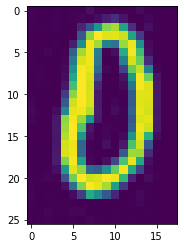

(26, 18)
(26, 26)


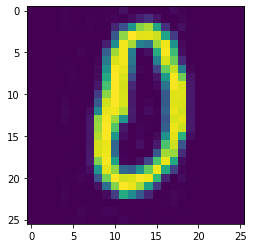

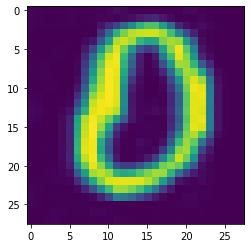

[0]


In [6]:
sharp_kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])

def paddingImage(input_arr):
    y = input_arr.shape[0]
    x = input_arr.shape[1]
    padding_val = abs(y-x) // 2

    if x<y:        
        trans_img = []
        padding_arr = [0.0]*padding_val
        try:
            for i in range(y):
                trans_img.append( padding_arr + list(input_arr[i]) + padding_arr )
        except:
            print('err',i)
            print(input_arr)
            print(np.array(trans_img).shape)
        return np.array( trans_img )
    return input_arr

def Gausian_Sharp(input_arr, sigma):
    input_arr = cv2.GaussianBlur(input_arr, (0,0), sigma)
    input_arr = cv2.filter2D(input_arr, -1, sharp_kernel)
    return input_arr

''' 3차원으로 만들어 테스트 - 패딩비트 추가, 가우시안-샤프닝 필터 적용'''
answer = []
for i in range(10):
  if i == 0:
    num_img = cv2.imread('handnumber/hand'+str(i)+'.png')
    # num_img = cv2.imread('new_test/'+str(i)+'.png')
    # num_img = cv2.imread('computerNumber/realNumber'+str(i)+'.png')
    num_img = cv2.cvtColor( num_img, cv2.COLOR_BGR2GRAY)
    plt.imshow(num_img)
    plt.show()
    print(num_img.shape)
    input_img = paddingImage(num_img)
    print(input_img.shape)
    plt.imshow(input_img)
    plt.show()
    input_img = cv2.resize(num_img, (28,28))
    input_img = Gausian_Sharp(input_img, 1)
    plt.imshow(input_img)
    plt.show()

    input_img = input_img / 255.0  
    
    input_img = np.expand_dims(input_img, axis=0).reshape(-1,28,28,1)
    answer.append(new2DModel.predict(input_img).argmax(axis=1)[0])
print(answer)